In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Polygon
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [10]:
datapath = '../input/fivethirtyeight-comic-characters-dataset/marvel-wikia-data.csv'
data = pd.read_csv(datapath)
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [11]:
data.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')

In [16]:
data.drop_duplicates(subset = 'page_id', keep = False, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.7+ MB


In [26]:
ID =data.groupby(['ID',])['ID'].count().reset_index(name='count')
ID=ID.set_index('ID')
ID


,count
ID,
Known to Authorities Identity,15
No Dual Identity,1788
Public Identity,4528
Secret Identity,6275


In [ ]:
Char= data.groupby(['name','ID'])[ 'name'].count().reset_index(name='appearances')
Char

In [37]:
secret_identity = Char.query("`ID` == 'Secret Identity'")
secret_identity

,name,ID,show_count
0,'Spinner (Earth-616),Secret Identity,1
1,107 (Earth-616),Secret Identity,1
2,11-Ball (Earth-616),Secret Identity,1
3,115 (Legion Personality) (Earth-616),Secret Identity,1
4,14 (Earth-616),Secret Identity,1
...,...,...,...
12593,Zuhn (Earth-616),Secret Identity,1
12598,Zuzha Yu (Earth-616),Secret Identity,1
12600,Zzutak (Earth-616),Secret Identity,1
12601,Zzutak's Enemy (Earth-616),Secret Identity,1


In [41]:
popularity = data.query("`APPEARANCES` > 4000")
popularity

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0


In [42]:
popularity1 = data.query("`APPEARANCES` > 3000")
popularity1

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0


Text(0.5, 1.0, 'Identities')

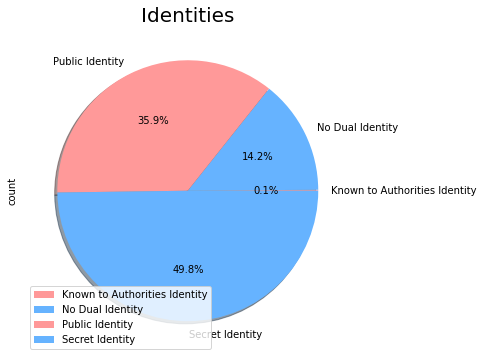

In [44]:
colors = ['#ff9999','#66b3ff']
types.plot.pie(y='count',autopct='%.1f%%', shadow=True, legend= 'type' , figsize=(6,6),colors=colors)
plt.title('Identities', fontsize=20)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Secret Identity'),
  Text(1, 0, 'Public Identity'),
  Text(2, 0, 'No Dual Identity'),
  Text(3, 0, 'Known to Authorities Identity')])

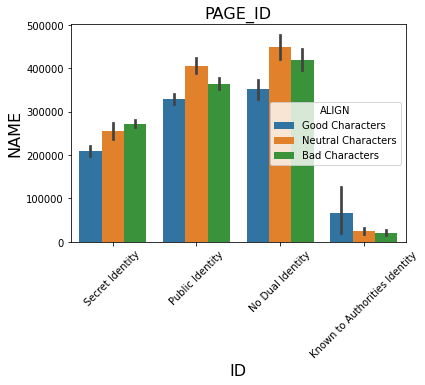

In [49]:
sns.barplot(x =data.reset_index()['ID'], y=data.reset_index()['page_id'],
            hue =  data.reset_index()['ALIGN']);
plt.title('PAGE_ID', fontsize=16)
plt.xlabel('ID', fontsize=16);
plt.ylabel('NAME', fontsize=16);
sns.set(rc = {'figure.figsize':(20,10)})
plt.xticks(rotation = 45)

In [ ]:
sns.set_style("whitegrid")
# plot boxplot
gfg = sns.lineplot(x ='name', y ='page_id', hue="ALIGN" ,style="ALIGN", markers=True, data = data)
 
# add label to the axis and label to the plot
gfg.set(xlabel ="NAME", ylabel = "PAGE_ID", title ='release_per_year')

[Text(0.5, 0, 'NAME'),
 Text(0, 0.5, 'PAGE_ID'),
 Text(0.5, 1.0, 'release_per_year')]

In [ ]:
#findings from the analysis done 

""" 
Public identity is the most common identity among the characters.
Most good characters and bad characters had no dual identity.
Spider-Man is th most popular character with more than 4000 appearances.
There are 6275 characters with secret identity.
No Dual Identity --- 1788.
Known to Authorities Identity --- 15
No Dual Identity --- 1788.
Public Identity --- 4528.

"""

